### AAI-530 Final Project: Delivery Drone Flight Predictions
<br>Group 6: Ahmed Salem, Matt Thompson, Darin Verduzco
<br>GitHub: https://github.com/caliskate/delivery-drone-flight-predictions
<br>Dataset source: https://doi.org/10.1184/R1/12683453.v1

### Dataset descriptions:
(196 flights total, 18 unique flight dates, 11.5 average number of flights per day)

| **Variable**            | **Description**                                                                                                                                 |
|-------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------|
| **flight**              | An integer that represents the code of the flight performed. A flight is defined as the dataset recorded from take-off to landing on a predefined route. |
| **time**                | Seconds elapsed after flight start time.                                                                                                        |
| **wind_speed**          | Airspeed provided by the anemometer in meters per second (m/s).                                                                                |
| **wind_angle**          | Angle in degrees (deg) of the air flowing through the anemometer with respect to the north.                                                     |
| **battery_voltage**     | System voltage in Volts (V) measured immediately after the battery.                                                                             |
| **battery_current**     | System current in Ampere (A) measured immediately after the battery.                                                                           |
| **position_x**          | Longitude of the aircraft in degrees (deg).                                                                                                    |
| **position_y**          | Latitude of the aircraft in degrees (deg).                                                                                                     |
| **position_z**          | Altitude of the aircraft in meters (m) with respect to sea level.                                                                              |
| **orientation_x**       | Aircraft orientation in quaternions.                                                                                                           |
| **linear_acceleration_x**| Ground acceleration in meters per squared second (m/s²).                                                                                      |
| **linear_acceleration_y**| Ground acceleration in meters per squared second (m/s²).                                                                                      |
| **linear_acceleration_z**| Ground acceleration in meters per squared second (m/s²).                                                                                      |
| **speed**               | Programmed horizontal ground speed during cruise in meters per second (m/s).                                                                  |
| **altitude**            | Predefined altitude in meters (m). The aircraft takes off vertically until it reaches the preset altitude.                                      |
| **payload**             | Mass of the payload attached to the aircraft in grams (g). The payload used was confined in a standard USPS Small Flat Rate Box.                  |
| **date**                | Date of the flight.                                                                                                                            |
| **time_day**            | Local time when the flight started in the 24-hour format.                                                                                       |
| **route**               | Route type (see directly below):                                                                                                                |
|                         | - R1 to R7: Full flights completing a cruise movement.                                                                                          |
|                         | - A1: Ancillary ground test with no propellers and no motor movement.                                                                          |
|                         | - A2: Ancillary ground test with no propellers and minimum movement.                                                                           |
|                         | - A3: Ancillary ground test with propellers and minimum movement.                                                                              |
|                         | - H: Hover test with no horizontal movement.                                                                                                    |

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import LabelEncoder

### Import dataset from local dir

# 1 - read file

In [2]:
drone_raw_df =  pd.read_csv("flights.csv", low_memory = False)

# 2 - head

In [3]:
drone_raw_df.head()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
0,1,0.0,0.1,12,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.006815,0.004258,-0.120405,-9.811137,4,0,25,4/7/2019,10:13,R5
1,1,0.2,0.1,3,24.227180,0.095421,-79.782396,40.458047,269.332056,0.001768,...,0.002034,0.006175,-0.116397,-9.810392,4,0,25,4/7/2019,10:13,R5
2,1,0.3,0.1,352,24.225929,0.095421,-79.782396,40.458047,269.333081,0.001768,...,-0.000874,0.002696,-0.128592,-9.809440,4,0,25,4/7/2019,10:13,R5
3,1,0.5,0.1,354,24.224678,0.095421,-79.782396,40.458047,269.334648,0.001775,...,0.002443,0.002024,-0.128271,-9.810159,4,0,25,4/7/2019,10:13,R5
4,1,0.6,0.1,359,24.210905,0.079518,-79.782396,40.458047,269.336178,0.001775,...,-0.006425,0.008271,-0.119890,-9.812125,4,0,25,4/7/2019,10:13,R5


# 3 - describe

In [4]:
drone_raw_df.describe()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,velocity_y,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload
count,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,...,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000
mean,162.445513,97.766940,4.337992,169.470760,22.435459,17.932477,-77.773754,39.438805,295.812932,-0.010096,...,2.273353,0.296500,-0.001222,0.000121,0.028713,-0.317346,0.017140,-9.795682,7.325116,240.937238
std,71.445026,62.667401,3.494649,101.176006,1.200742,10.865654,12.506800,6.342148,58.305928,0.047414,...,3.294641,1.459703,0.116713,0.175669,0.251162,0.772273,0.460883,0.462295,3.209065,211.373066
min,1.000000,0.000000,0.000000,0.000000,18.810810,-0.326023,-79.946543,0.000000,0.000000,-0.546413,...,-4.230620,-4.015751,-2.279608,-3.674915,-1.857536,-5.889537,-9.108024,-22.687924,0.000000,0.000000
25%,112.000000,46.200000,1.500000,80.000000,21.513987,7.140693,-79.782786,40.458878,271.311215,-0.023949,...,0.000000,-0.143707,-0.043230,-0.038335,-0.040691,-0.691028,-0.203128,-9.895812,4.000000,0.000000
50%,166.000000,93.000000,3.300000,177.000000,22.306536,21.923040,-79.782747,40.458994,292.120051,-0.001910,...,0.064984,0.028842,-0.000317,0.000070,0.001101,-0.052744,0.010875,-9.801070,8.000000,250.000000
75%,223.000000,141.400000,6.500000,244.000000,23.162939,25.270737,-79.782259,40.459057,325.245442,0.010370,...,4.010875,0.850420,0.041166,0.040656,0.051446,0.179579,0.227538,-9.661465,10.000000,500.000000
max,279.000000,428.290000,18.100000,359.000000,25.894913,47.193779,0.000000,40.459682,376.188721,0.414962,...,12.703530,5.842570,3.022839,2.833664,2.172410,4.647753,7.139876,-3.830504,12.000000,750.000000


# 4 - raw.dtypes

In [5]:
drone_raw_df.dtypes

flight                     int64
time                     float64
wind_speed               float64
wind_angle                 int64
battery_voltage          float64
battery_current          float64
position_x               float64
position_y               float64
position_z               float64
orientation_x            float64
orientation_y            float64
orientation_z            float64
orientation_w            float64
velocity_x               float64
velocity_y               float64
velocity_z               float64
angular_x                float64
angular_y                float64
angular_z                float64
linear_acceleration_x    float64
linear_acceleration_y    float64
linear_acceleration_z    float64
speed                      int64
payload                    int64
altitude                  object
date                      object
time_day                  object
route                     object
dtype: object

# 5 -  dopy df

In [6]:
# Make a copy of the dataframe to be edited
drone_df_edited = drone_raw_df.copy()

# 6 - combine date.astype(str), space, time columns
# 7 - convert to datetime, dayfirst = True

In [7]:
# Preconverted ddmmyyyy  - no effect
# removed datacleanup steps - no effect
# replicate datetime column and datetime conversion - WIP
# replicate all other steps in HW assignment - WIP


# drone_df_edited['datetime'] = drone_df_edited['date'].astype(str) + ' ' + drone_df_edited['time_day'] + pd.to_timedelta(drone_df_edited['time'], unit='s').dt.round('s')  # Round to the nearest second
# drone_df_edited['datetime'] = pd.to_datetime(drone_df_edited['date'].astype(str) + ' ' + drone_df_edited['time_day'], dayfirst = True) + pd.to_timedelta(drone_df_edited['time'], unit='s')

drone_df_edited['datetime'] = pd.to_datetime(
    drone_df_edited['date'].astype(str) + ' ' + drone_df_edited['time_day'],
    format="%m/%d/%Y %H:%M",  # Adjust format based on actual data
) + pd.to_timedelta(drone_df_edited['time'], unit='s')



# from hw assignment
# Create your Datetime column (with space between)
# df['Datetime'] = df['Date'].astype(str) + " " + df['Time']
# Convert to Datetime type (dayfirst format)
# df['Datetime'] = pd.to_datetime(df['Datetime'], dayfirst=True)

# Project work - Data cleanup

In [8]:
drone_df_edited['datetime'][0]

Timestamp('2019-04-07 10:13:00')

# Data evaluation

In [9]:
drone_df_edited.head()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route,datetime
0,1,0.0,0.1,12,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.004258,-0.120405,-9.811137,4,0,25,4/7/2019,10:13,R5,2019-04-07 10:13:00.000
1,1,0.2,0.1,3,24.227180,0.095421,-79.782396,40.458047,269.332056,0.001768,...,0.006175,-0.116397,-9.810392,4,0,25,4/7/2019,10:13,R5,2019-04-07 10:13:00.200
2,1,0.3,0.1,352,24.225929,0.095421,-79.782396,40.458047,269.333081,0.001768,...,0.002696,-0.128592,-9.809440,4,0,25,4/7/2019,10:13,R5,2019-04-07 10:13:00.300
3,1,0.5,0.1,354,24.224678,0.095421,-79.782396,40.458047,269.334648,0.001775,...,0.002024,-0.128271,-9.810159,4,0,25,4/7/2019,10:13,R5,2019-04-07 10:13:00.500
4,1,0.6,0.1,359,24.210905,0.079518,-79.782396,40.458047,269.336178,0.001775,...,0.008271,-0.119890,-9.812125,4,0,25,4/7/2019,10:13,R5,2019-04-07 10:13:00.600


In [10]:
# Edited dataset summary
desc = drone_df_edited.describe()

# Force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,datetime
count,257896.0000,257896.0000,257896.0000,257896.0000,257896.0000,257896.0000,257896.0000,257896.0000,257896.0000,257896.0000,...,257896.0000,257896.0000,257896.0000,257896.0000,257896.0000,257896.0000,257896.0000,257896.0000,257896.0000,257896
mean,162.4455,97.7669,4.3380,169.4708,22.4355,17.9325,-77.7738,39.4388,295.8129,-0.0101,...,0.2965,-0.0012,0.0001,0.0287,-0.3173,0.0171,-9.7957,7.3251,240.9372,2019-07-07 04:34:42.441848064
min,1.0000,0.0000,0.0000,0.0000,18.8108,-0.3260,-79.9465,0.0000,0.0000,-0.5464,...,-4.0158,-2.2796,-3.6749,-1.8575,-5.8895,-9.1080,-22.6879,0.0000,0.0000,2019-04-07 10:13:00
25%,112.0000,46.2000,1.5000,80.0000,21.5140,7.1407,-79.7828,40.4589,271.3112,-0.0239,...,-0.1437,-0.0432,-0.0383,-0.0407,-0.6910,-0.2031,-9.8958,4.0000,0.0000,2019-06-24 11:17:22.150000128
50%,166.0000,93.0000,3.3000,177.0000,22.3065,21.9230,-79.7827,40.4590,292.1201,-0.0019,...,0.0288,-0.0003,0.0001,0.0011,-0.0527,0.0109,-9.8011,8.0000,250.0000,2019-07-09 11:19:05.849999872
75%,223.0000,141.4000,6.5000,244.0000,23.1629,25.2707,-79.7823,40.4591,325.2454,0.0104,...,0.8504,0.0412,0.0407,0.0514,0.1796,0.2275,-9.6615,10.0000,500.0000,2019-07-18 14:33:52.524999936
max,279.0000,428.2900,18.1000,359.0000,25.8949,47.1938,0.0000,40.4597,376.1887,0.4150,...,5.8426,3.0228,2.8337,2.1724,4.6478,7.1399,-3.8305,12.0000,750.0000,2019-10-24 10:12:32.700000
std,71.4450,62.6674,3.4946,101.1760,1.2007,10.8657,12.5068,6.3421,58.3059,0.0474,...,1.4597,0.1167,0.1757,0.2512,0.7723,0.4609,0.4623,3.2091,211.3731,NaN


In [11]:
# Verify edited datatypes
drone_df_edited.dtypes

flight                            int64
time                            float64
wind_speed                      float64
wind_angle                        int64
battery_voltage                 float64
battery_current                 float64
position_x                      float64
position_y                      float64
position_z                      float64
orientation_x                   float64
orientation_y                   float64
orientation_z                   float64
orientation_w                   float64
velocity_x                      float64
velocity_y                      float64
velocity_z                      float64
angular_x                       float64
angular_y                       float64
angular_z                       float64
linear_acceleration_x           float64
linear_acceleration_y           float64
linear_acceleration_z           float64
speed                             int64
payload                           int64
altitude                         object


In [12]:
print(drone_df_edited['date'].nunique())  # Number of unique dates

18


In [13]:
print(drone_df_edited['date'].value_counts())

date
8/5/2019      27819
7/15/2019     25772
7/24/2019     20981
7/3/2019      19682
6/19/2019     19067
6/11/2019     16904
7/10/2019     16099
6/25/2019     15349
6/24/2019     15153
7/9/2019      14431
5/6/2019      10601
7/18/2019     10295
6/29/2019     10159
7/1/2019       9807
9/19/2019      9378
4/7/2019       8299
10/24/2019     5012
6/5/2019       3088
Name: count, dtype: int64


In [14]:
print(drone_df_edited['datetime'].isna().sum()) 

0


In [15]:
drone_df_edited = drone_df_edited.sort_values('date')

In [16]:
drone_df_edited.head()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route,datetime
257895,279,152.70,1.1,184,22.861195,0.111325,-79.782802,40.459018,271.600637,0.021419,...,0.445074,-0.271222,-9.798157,10,0,25-50-100-25,10/24/2019,10:10,R7,2019-10-24 10:12:32.700
254548,276,102.50,1.8,145,20.765261,25.763748,-79.782801,40.459051,280.222527,0.003746,...,-0.071784,-0.099137,-9.931442,10,500,25,10/24/2019,9:32,R1,2019-10-24 09:33:42.500
254549,276,102.60,1.8,146,20.775278,25.056040,-79.782801,40.459051,280.131230,0.003618,...,-0.028732,0.038189,-9.937958,10,500,25,10/24/2019,9:32,R1,2019-10-24 09:33:42.600
254550,276,102.81,1.8,145,20.814091,24.801582,-79.782801,40.459051,280.045693,0.002930,...,0.149616,0.129041,-9.892231,10,500,25,10/24/2019,9:32,R1,2019-10-24 09:33:42.810
254551,276,103.00,1.8,143,20.805326,25.819410,-79.782802,40.459051,279.861082,0.002317,...,0.131311,0.119963,-9.663590,10,500,25,10/24/2019,9:32,R1,2019-10-24 09:33:43.000


In [17]:
drone_df_edited['datetime'].head()

257895   2019-10-24 10:12:32.700
254548   2019-10-24 09:33:42.500
254549   2019-10-24 09:33:42.600
254550   2019-10-24 09:33:42.810
254551   2019-10-24 09:33:43.000
Name: datetime, dtype: datetime64[ns]

In [18]:
drone_df_edited['date'].head()

257895    10/24/2019
254548    10/24/2019
254549    10/24/2019
254550    10/24/2019
254551    10/24/2019
Name: date, dtype: object

In [19]:
prediction1_columns = [
    'battery_current',
    'battery_voltage',
    'payload',
    'altitude',
    'speed',
    'wind_speed',
    'wind_angle'
]

In [20]:
# Debug
print("duplicate dates",drone_df_edited['date'].duplicated().sum())
print("NaN datetime values",drone_df_edited['datetime'].isna().sum()) 
print("NaN date values",drone_df_edited['datetime'].isna().sum()) 
print("total rows",len(drone_df_edited))  # Total rows
print("Unique datetime entries:", drone_df_edited['datetime'].nunique())
print("Unique date entries:", drone_df_edited['date'].nunique())
print("Total rows:", len(drone_df_edited))  # Total number of rows
# print("column types:",drone_df_edited.info())  # Check column data types
print("values per date:\n",drone_df_edited.groupby('date').size())

duplicate dates 257878
NaN datetime values 0
NaN date values 0
total rows 257896
Unique datetime entries: 257896
Unique date entries: 18
Total rows: 257896
values per date:
 date
10/24/2019     5012
4/7/2019       8299
5/6/2019      10601
6/11/2019     16904
6/19/2019     19067
6/24/2019     15153
6/25/2019     15349
6/29/2019     10159
6/5/2019       3088
7/1/2019       9807
7/10/2019     16099
7/15/2019     25772
7/18/2019     10295
7/24/2019     20981
7/3/2019      19682
7/9/2019      14431
8/5/2019      27819
9/19/2019      9378
dtype: int64


# Before date conversion (project data)

In [21]:
type(drone_df_edited['date'])

pandas.core.series.Series

In [22]:
drone_df_edited.date[0]

'4/7/2019'

In [23]:
drone_df_edited.datetime[0]

Timestamp('2019-04-07 10:13:00')

In [24]:
drone_df_edited.dtypes

flight                            int64
time                            float64
wind_speed                      float64
wind_angle                        int64
battery_voltage                 float64
battery_current                 float64
position_x                      float64
position_y                      float64
position_z                      float64
orientation_x                   float64
orientation_y                   float64
orientation_z                   float64
orientation_w                   float64
velocity_x                      float64
velocity_y                      float64
velocity_z                      float64
angular_x                       float64
angular_y                       float64
angular_z                       float64
linear_acceleration_x           float64
linear_acceleration_y           float64
linear_acceleration_z           float64
speed                             int64
payload                           int64
altitude                         object


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

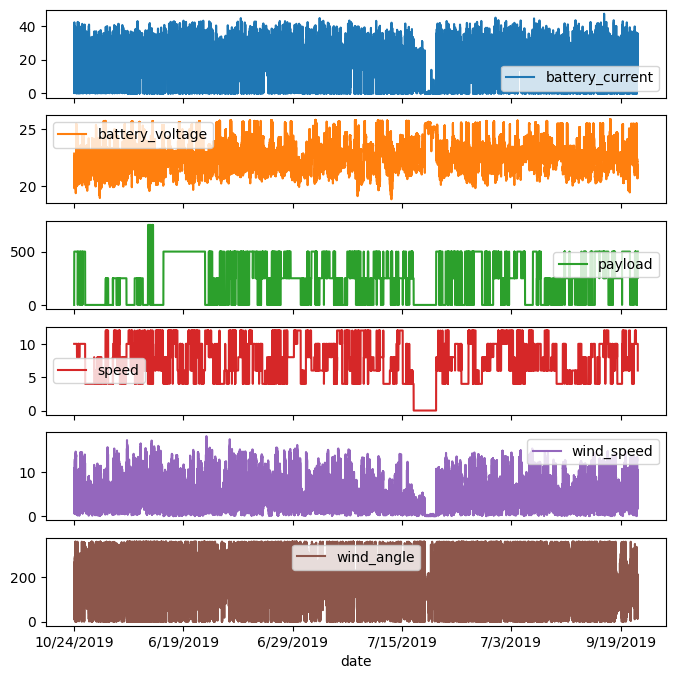

In [25]:
# Plot the data with 'date' on the x-axis
drone_df_edited.plot('date', prediction1_columns, subplots=True, figsize=(8, 8))

In [26]:
# 1st Suggestion per Roozbeh to convert date
# drone_df_edited['date'] = drone_df_edited['datetime'].dt.floor('D')

In [27]:
# Original date conversion as per M2 assignment instructions
# drone_df_edited['date'] = drone_df_edited['datetime'].dt.date

# Date Conversion

In [28]:
# 2nd suggestion per Roozbeh to convert date
drone_df_edited['date'] = pd.to_datetime(drone_df_edited['date'])

# After date conversion (project data)

In [29]:
type(drone_df_edited['date'])

pandas.core.series.Series

In [30]:
drone_df_edited.date[0]

Timestamp('2019-04-07 00:00:00')

In [31]:
drone_df_edited.datetime[0]

Timestamp('2019-04-07 10:13:00')

In [32]:
drone_df_edited.dtypes

flight                            int64
time                            float64
wind_speed                      float64
wind_angle                        int64
battery_voltage                 float64
battery_current                 float64
position_x                      float64
position_y                      float64
position_z                      float64
orientation_x                   float64
orientation_y                   float64
orientation_z                   float64
orientation_w                   float64
velocity_x                      float64
velocity_y                      float64
velocity_z                      float64
angular_x                       float64
angular_y                       float64
angular_z                       float64
linear_acceleration_x           float64
linear_acceleration_y           float64
linear_acceleration_z           float64
speed                             int64
payload                           int64
altitude                         object


In [33]:
# # Aggregate columns for each date
# drone_df_edited = drone_df_edited.groupby('date', as_index=False)[prediction1_columns].mean()

In [34]:
drone_df_edited.head()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route,datetime
257895,279,152.70,1.1,184,22.861195,0.111325,-79.782802,40.459018,271.600637,0.021419,...,0.445074,-0.271222,-9.798157,10,0,25-50-100-25,2019-10-24,10:10,R7,2019-10-24 10:12:32.700
254548,276,102.50,1.8,145,20.765261,25.763748,-79.782801,40.459051,280.222527,0.003746,...,-0.071784,-0.099137,-9.931442,10,500,25,2019-10-24,9:32,R1,2019-10-24 09:33:42.500
254549,276,102.60,1.8,146,20.775278,25.056040,-79.782801,40.459051,280.131230,0.003618,...,-0.028732,0.038189,-9.937958,10,500,25,2019-10-24,9:32,R1,2019-10-24 09:33:42.600
254550,276,102.81,1.8,145,20.814091,24.801582,-79.782801,40.459051,280.045693,0.002930,...,0.149616,0.129041,-9.892231,10,500,25,2019-10-24,9:32,R1,2019-10-24 09:33:42.810
254551,276,103.00,1.8,143,20.805326,25.819410,-79.782802,40.459051,279.861082,0.002317,...,0.131311,0.119963,-9.663590,10,500,25,2019-10-24,9:32,R1,2019-10-24 09:33:43.000


In [35]:
# Debug
print("duplicate dates",drone_df_edited['date'].duplicated().sum())
print("NaN datetime values",drone_df_edited['datetime'].isna().sum()) 
print("NaN date values",drone_df_edited['datetime'].isna().sum()) 
print("total rows",len(drone_df_edited))  # Total rows
print("Unique datetime entries:", drone_df_edited['datetime'].nunique())
print("Unique date entries:", drone_df_edited['date'].nunique())
print("Total rows:", len(drone_df_edited))  # Total number of rows
# print("column types:",drone_df_edited.info())  # Check column data types
print("values per date:\n",drone_df_edited.groupby('date').size())

duplicate dates 257878
NaN datetime values 0
NaN date values 0
total rows 257896
Unique datetime entries: 257896
Unique date entries: 18
Total rows: 257896
values per date:
 date
2019-04-07     8299
2019-05-06    10601
2019-06-05     3088
2019-06-11    16904
2019-06-19    19067
2019-06-24    15153
2019-06-25    15349
2019-06-29    10159
2019-07-01     9807
2019-07-03    19682
2019-07-09    14431
2019-07-10    16099
2019-07-15    25772
2019-07-18    10295
2019-07-24    20981
2019-08-05    27819
2019-09-19     9378
2019-10-24     5012
dtype: int64


# Plot with date conversion (issue)

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

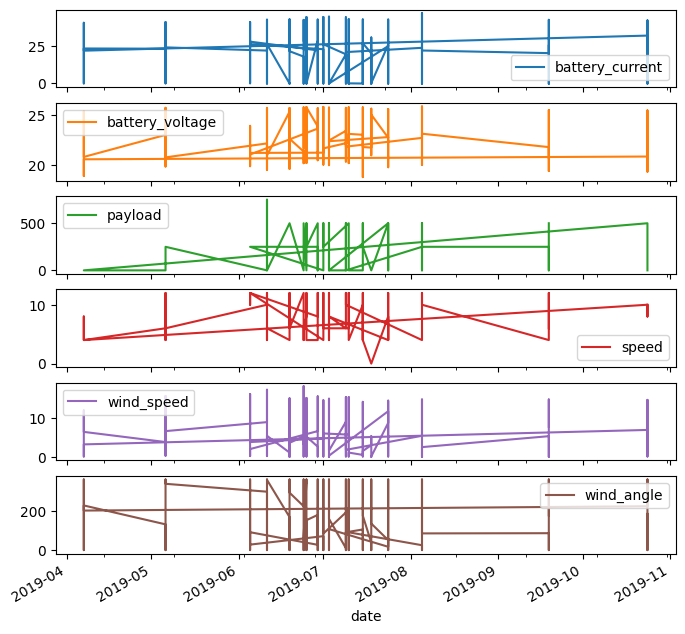

In [36]:
# Plot the data with 'date' on the x-axis - using pandas
drone_df_edited.plot('date', prediction1_columns, subplots=True, figsize=(8, 8))

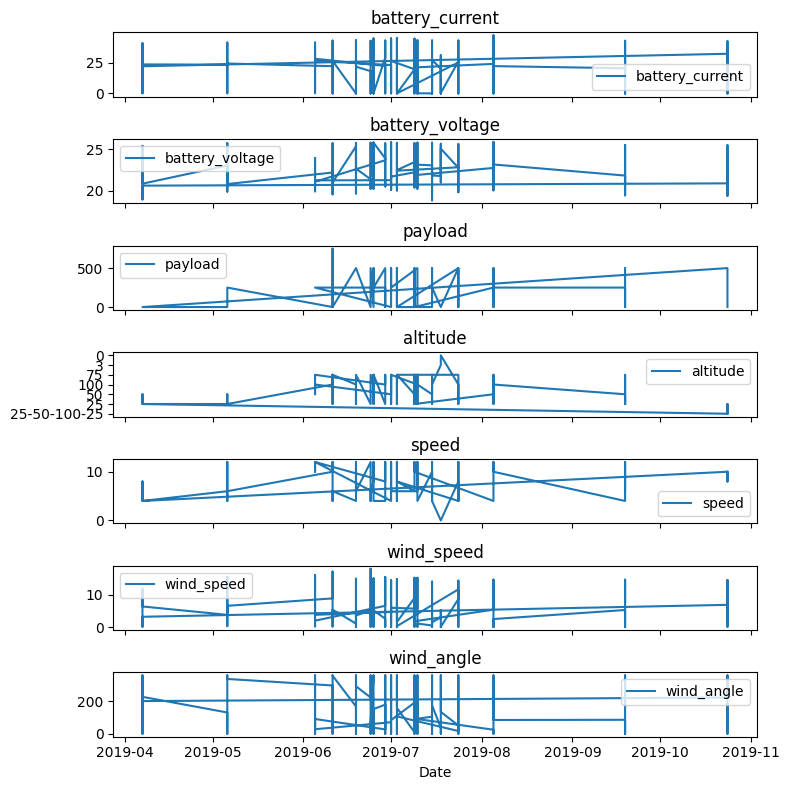

In [37]:
# Create a line plot with 'date' on the x-axis - using matplotlib
fig, axes = plt.subplots(len(prediction1_columns), 1, figsize=(8, 8), sharex=True)

for i, column in enumerate(prediction1_columns):
    axes[i].plot(drone_df_edited['date'], drone_df_edited[column], label=column)
    axes[i].set_title(column)
    axes[i].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()